In [4]:
# importing the modules 
import numpy as np  
import pandas as pd # to read the data 
import matplotlib.pyplot as plt # to plot the results of the analysis 
from sklearn.preprocessing import LabelEncoder # for encoding the labels 

In [6]:
df = pd.read_csv('c://Python files/spam.csv', encoding = 'latin_1')
df.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(10)

In [ ]:
df.shape
df.columns

## Data Cleaning

In [ ]:
df.info() 

Droping the columns with large no of **missing values (NaN)** 

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [ ]:
df.head()

In [8]:
df.columns = ['target', 'text']
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Encoding the target column 
{ham : 0, spam : 1}

In [9]:
encoder = LabelEncoder() 
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
1945,0,Can Ì_ call me at 10:10 to make sure dat i've ...
1192,0,I was up all night too worrying about this app...
5203,0,Me fine..absolutly fine
95,1,Your free ringtone is waiting to be collected....
2711,0,"Wen ur lovable bcums angry wid u, dnt take it ..."


In [ ]:
## missing values in the text feature 
df.isnull().sum() 

In [ ]:
# checking for the duplicated values and removing them from the df 
df.duplicated().sum() 

In [10]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum() 

0

## EDA

In [ ]:
# % of spam and ham messeages 
df['target'].value_counts().plot(kind = 'pie', labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show() 

 From the above distribution we can see that the data is heavily 
 imbalance.

In [12]:
!pip install nltk 

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 262.1/262.1 KB 4.0 MB/s eta 0:00:00


In [14]:
import nltk 

In [ ]:
df["n_char"] = df['text'].apply(len)

In [ ]:
df.head() 

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
 # Counting the no of words in each sms 
df['n_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x))) 

In [17]:
df['n_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
desc_stat = df.groupby(['target']).describe()

In [ ]:
n_char_stat = df.groupby(['target']).describe()['n_char']
n_word_stat = df.groupby(['target']).describe()['n_words']
n_sentence_stat = df.groupby(['target']).describe()['n_sentence']

In [18]:
import seaborn as sns 

In [ ]:
## creating a pivot table 
df_pivot_spam = df.pivot(columns = 'target', values = ['n_words', 'n_char', 'n_sentence'])
df_pivot_spam

In [ ]:
df_pivot_spam['n_words'].plot.density(figsize = (12, 4), linewidth = 2)
plt.show() 

In [ ]:
df_pivot_spam['n_char'].plot.density(figsize = (12, 4), linewidth = 2)
plt.show() 

In [ ]:
figure = plt.figure(figsize = (8, 6))
sns.kdeplot(df[df['target'] == 1]['n_words'], shade = True)
sns.kdeplot(df[df['target'] == 0]['n_words'], shade = True)
plt.legend(['spam', 'ham']) 
plt.show() 

 Drawing **histograms** for number of characters in each text in the two classes

In [19]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 1]['n_char'])
sns.histplot(df[df['target'] == 0]['n_char'])
plt.show() 

KeyError: 'n_char'

<Figure size 864x432 with 0 Axes>

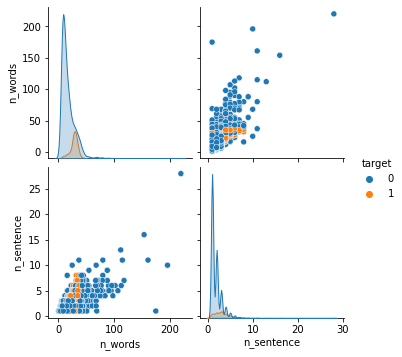

In [20]:
sns.pairplot(df, hue = 'target')
plt.show() 

<AxesSubplot:>

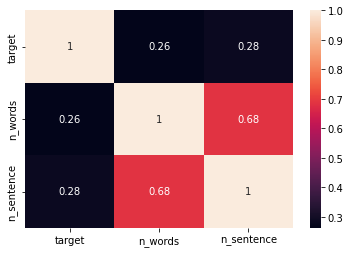

In [21]:
# ploting the correalation plot 
sns.heatmap(df[:-1].corr(), annot = True) 



1.   As the features are highly correlated among themselves we drop other features and keep the n_char feature only
2.   We find the most frequent **words** 




In [ ]:
plt.hist(df['n_char'], edgecolor = 'red', bins = 5)
plt.show() 

## Data Preprocessing

*   Converting the text into lower case
*   Tokenizing the text (breaking the text into words) 
*   Removing the special characters 
*   Removing the stop words and punctutaions 
*   Stemming 





In [22]:
from nltk.corpus import stopwords  # for removing the stop words 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
from nltk.stem.porter import PorterStemmer  # For steeming the text 

In [36]:
# creating an object of the PortStemmer 
ps = PorterStemmer() 
ps.stem("Dance")

'danc'

In [37]:
# for punctuation 
from string import punctuation 
punc_list = list(punctuation) 

In [38]:
def transform_text(text): 
  # tokenizing the text 

  text = text.lower() 
  text = nltk.word_tokenize(text)
  y = [] 

  # removing the special characters

  for i in text: 
    if i.isalnum(): 
      y.append(i)

  text = y[ : ] # clonig y as list is mutable
  y.clear() 

  for i in text: 
    if i not in stopwords.words('english') and i not in punc_list: 
      y.append(i)
  # stemming the text (using simillar words )

  text = y[:]
  y.clear() 

  for i in text: 
    y.append(ps.stem(i))

  return ' '.join(y)

In [26]:
df['text'].apply(transform_text)

NameError: name 'ps' is not defined

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head() 

,target,text,n_words,n_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah think goe usf live around though


In [42]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 KB 2.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
# generating word cloud of spam messeges 
from wordcloud import WordCloud 

In [44]:
wc = WordCloud(width = 500, height = 500, min_font_size= 10, background_color= 'black')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

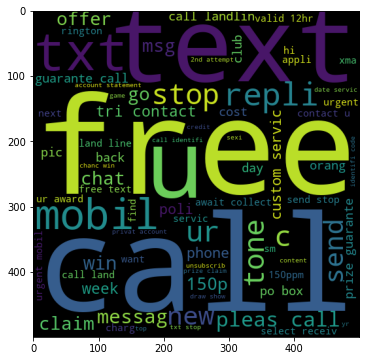

In [46]:
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc) 

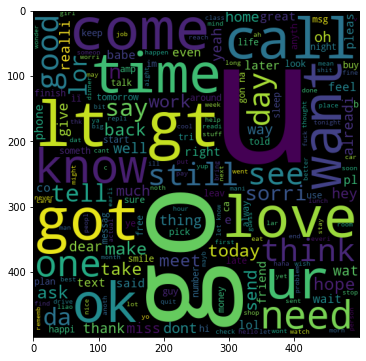

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(ham_wc)
plt.show()

In [48]:
# top 30 words for ham and spam messeges 
spam_corpus = []
for sms in df[df['target'] == 1]['transformed_text'].tolist():
  for word in sms.split(): 
    spam_corpus.append(word)

In [ ]:
len(spam_corpus) 

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


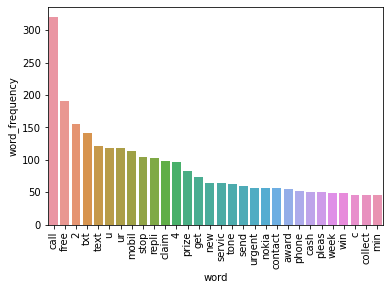

In [49]:
from collections import Counter 
#pd.DataFrame(Counter(spam_corpus).most_common(30)).plot(kind = 'bar')
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.ylabel('word_frequency')
plt.xlabel('word')
plt.show() 

In [50]:
# top 30 words for ham and spam messeges 
ham_corpus = []
for sms in df[df['target'] == 0]['transformed_text'].tolist():
  for word in sms.split(): 
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


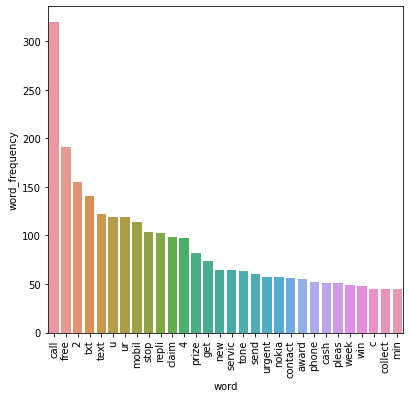

In [51]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.ylabel('word_frequency')
plt.xlabel('word')
plt.show() 

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


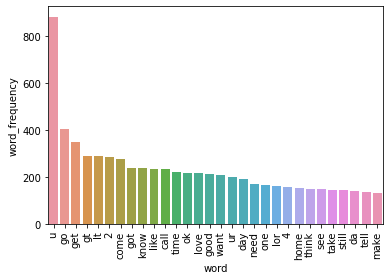

In [52]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.ylabel('word_frequency')
plt.xlabel('word')
plt.show() 

## Model Building 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer() 
tfidf = TfidfVectorizer(max_features = 3000) 

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray() 

In [ ]:
X.shape 
X_train 

In [55]:
y = df['target'].values 
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
gnb= GaussianNB() 
mnb = MultinomialNB() 
bnb = BernoulliNB() 

## Gaussian Normal Naive Bayes classifier 

In [59]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(y_test, y_pred1)
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

[0 0 0 ... 0 0 0] [0 1 1 ... 0 0 0]
[[788 108]
 [ 27 111]]
0.5068493150684932


## Multinomial Naive Bayes 

In [61]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2)) 
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


## Bernoulli Naive Bayes 

In [60]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [63]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [69]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuarcy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)
performance_df

,Algorithm,Accuarcy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [70]:
import pickle 
pickle.dump(tfidf, open('vectorize.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))